## Answer1
(a) The model result is shown below.The coefficients shows the linear part.


In [1]:
a<-read.table('/content/DoctorData.txt')
a$V5
a$V5=factor(a$V5)
levels(a$V5)
a$V5

[1] 1 1 1 1 1 2 2 2 2 2

[1] "1" "2"

[1] 1 1 1 1 1 2 2 2 2 2
Levels: 1 2

In [6]:
glm(V3 ~ V2*V5+I(V2^2)*V5+log(V4)*V5,data=a,family = poisson(link="log"))


Call:  glm(formula = V3 ~ V2 * V5 + I(V2^2) * V5 + log(V4) * V5, family = poisson(link = "log"), 
    data = a)

Coefficients:
(Intercept)           V2          V52      I(V2^2)      log(V4)       V2:V52  
   -6.05775      2.07309    -24.11603     -0.22814      0.70263      1.83398  
V52:I(V2^2)  V52:log(V4)  
   -0.01884      2.07532  

Degrees of Freedom: 9 Total (i.e. Null);  2 Residual
Null Deviance:	    644.3 
Residual Deviance: 0.2919 	AIC: 71.36

In [11]:
glm(a$V3~ a$V2+I(a$V2^2)+log(a$V4)+a$V2:a$V5+a$V5+I(a$V2^2):a$V5+a$V5:I(log(a$V4)),family=poisson(link=log))


Call:  glm(formula = a$V3 ~ a$V2 + I(a$V2^2) + log(a$V4) + a$V2:a$V5 + 
    a$V5 + I(a$V2^2):a$V5 + a$V5:I(log(a$V4)), family = poisson(link = log))

Coefficients:
       (Intercept)                a$V2           I(a$V2^2)           log(a$V4)  
          -6.05775             2.07309            -0.22814             2.77794  
             a$V52          a$V2:a$V52     I(a$V2^2):a$V52  a$V51:I(log(a$V4))  
         -24.11603             1.83398            -0.01884            -2.07532  
a$V52:I(log(a$V4))  
                NA  

Degrees of Freedom: 9 Total (i.e. Null);  2 Residual
Null Deviance:	    644.3 
Residual Deviance: 0.2919 	AIC: 71.36

In [2]:
amodel.pos<-glm(a$V3~a$V2+(a$V2)^2+log(a$V4)+(a$V2:a$V5)+a$V5+(a$V2^2:a$V5)+a$V5:a$V4,family=poisson(link=log))


In [3]:
summaryresult=summary(amodel.pos)
summaryresult
summaryresult$coefficients


Call:
glm(formula = a$V3 ~ a$V2 + (a$V2)^2 + log(a$V4) + (a$V2:a$V5) + 
    a$V5 + (a$V2^2:a$V5) + a$V5:a$V4, family = poisson(link = log))

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.136e+01  3.155e+00  -6.771 1.28e-11 ***
a$V2         1.203e+00  3.099e-01   3.882 0.000104 ***
log(a$V4)    2.352e+00  2.229e-01  10.551  < 2e-16 ***
a$V52        2.227e+00  1.900e+00   1.172 0.241033    
a$V2:a$V52  -4.881e-02  3.613e-01  -0.135 0.892553    
a$V51:a$V4  -3.576e-05  1.940e-05  -1.843 0.065353 .  
a$V52:a$V4  -2.351e-04  7.746e-05  -3.036 0.002400 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 644.26899  on 9  degrees of freedom
Residual deviance:   0.51984  on 3  degrees of freedom
AIC: 69.588

Number of Fisher Scoring iterations: 3


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-2.136408e+01,3.155096e+00,-6.7712951,1.276347e-11
a$V2,1.202958e+00,3.098969e-01,3.8818008,1.036858e-04
log(a$V4),2.351581e+00,2.228676e-01,10.5514735,5.000660e-26
a$V52,2.227016e+00,1.899520e+00,1.1724099,2.410325e-01
a$V2:a$V52,-4.880732e-02,3.613348e-01,-0.1350751,8.925525e-01
a$V51:a$V4,-3.575942e-05,1.940457e-05,-1.8428350,6.535311e-02
a$V52:a$V4,-2.351414e-04,7.745842e-05,-3.0357110,2.399693e-03


(b)The 90% 2-side CI for multiplicative change is [7.2790,15.1525]

In [ ]:
qnorm(0.95)
exp(summaryresult$coefficients[3,1]-qnorm(0.95)*summaryresult$coefficients[3,2])
exp(summaryresult$coefficients[3,1]+qnorm(0.95)*summaryresult$coefficients[3,2])


[1] 1.644854

[1] 7.279024

[1] 15.15251

(c)The test-statistic is $ \hat{\beta}/SE(\hat{\beta})$ which was an approximately normal distribution.The value is shown below and the p value is 0.2410 which suggest the V5 is not a significiant covariate in the case.

In [ ]:
TS=summaryresult$coefficients[4,1]/summaryresult$coefficients[4,2]
2*(1-pnorm(abs(TS)))

[1] 0.2410325

We can also apply the Chisq statistic  $ {\beta^̂}^2/{SE^2(\beta^̂)}$ which has an approximately Chisq distribution with DF=1.

In [ ]:
install.packages('car')
library(car)
linearHypothesis.default(amodel.pos,"a$V52=0")
1-pchisq(1.374545,1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: carData



,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,4,NA,NA,NA
2,3,1,1.374545,0.2410325


[1] 0.2410325

The TS is $D(M_1|M_0)=2log[L(\beta|M_1)/L(\beta|M_0)]$ which follows an approximately Chisq distribution with DF=6.
And TS value is 643.7491 and p value equals to 0 which suggest it is a significant or an adequate model.

In [ ]:
amodel2.pos <- glm(a$V3~1,family=poisson(link=log))
anova(amodel2.pos,amodel.pos,test='Chisq')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,644.2689908,NA,NA,NA
2,3,0.5198418,6,643.7491,8.485751e-136


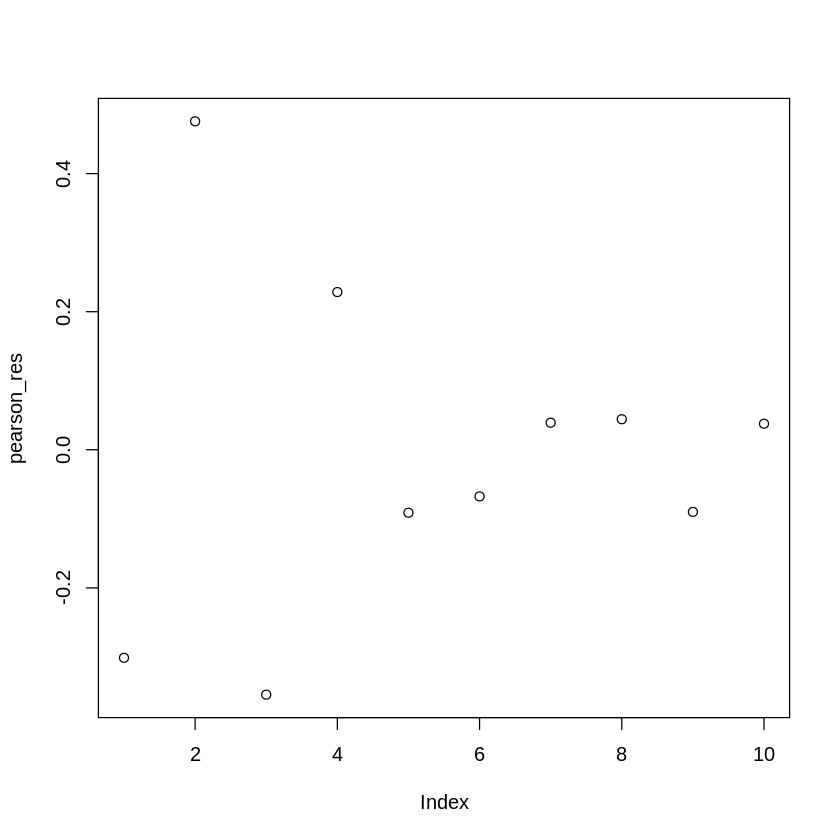

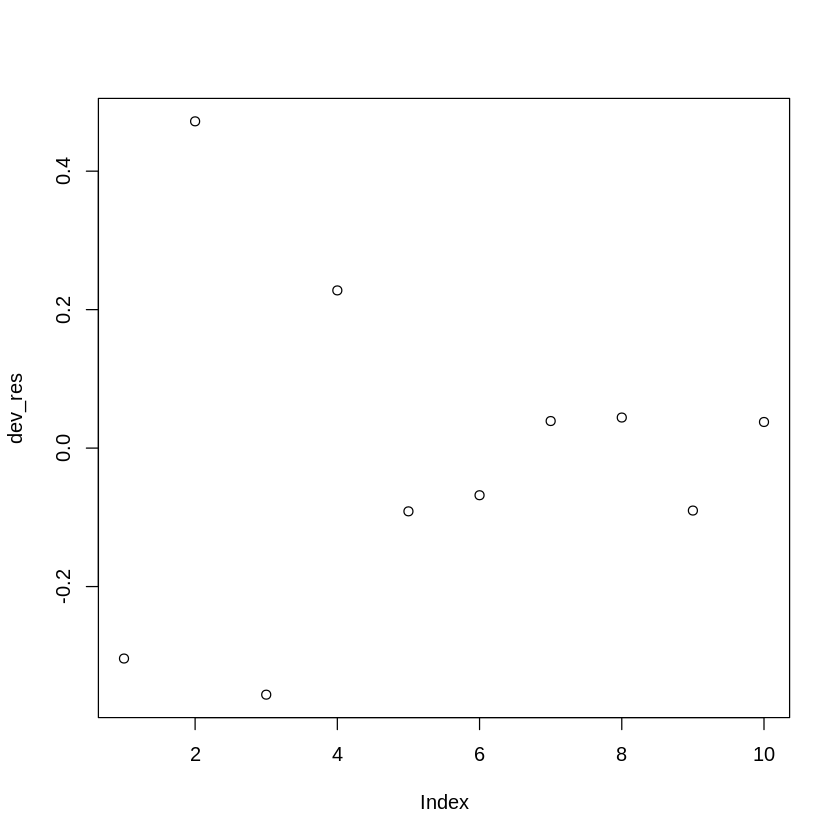

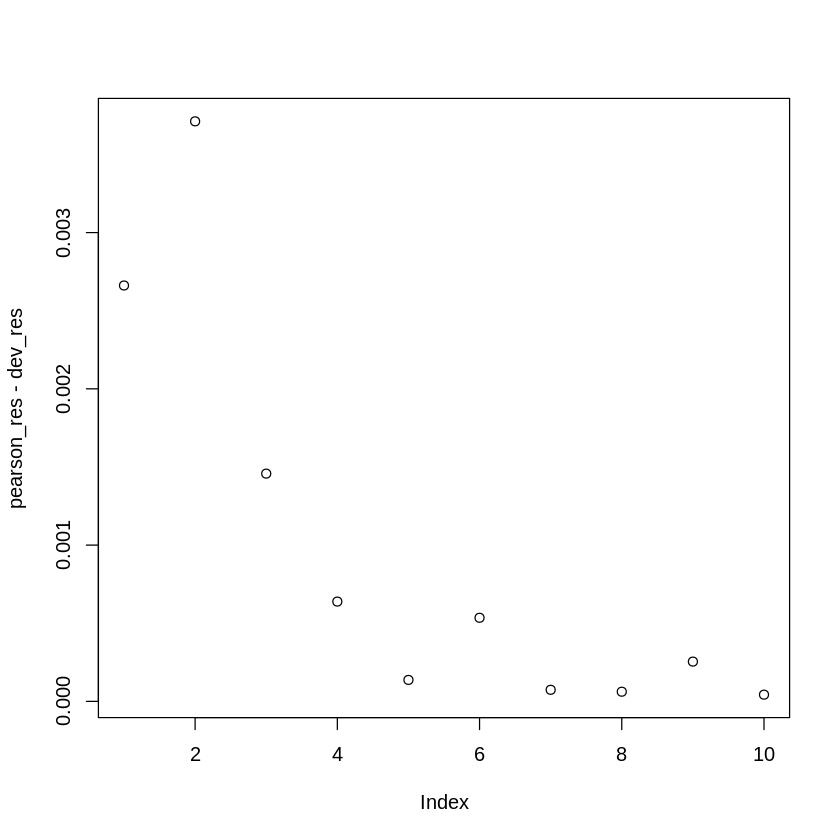

In [ ]:
pearson_res <- residuals(amodel.pos, type = "pearson")
dev_res <- residuals(amodel.pos, type = "deviance")
plot(pearson_res)
plot(dev_res)
plot(pearson_res-dev_res)

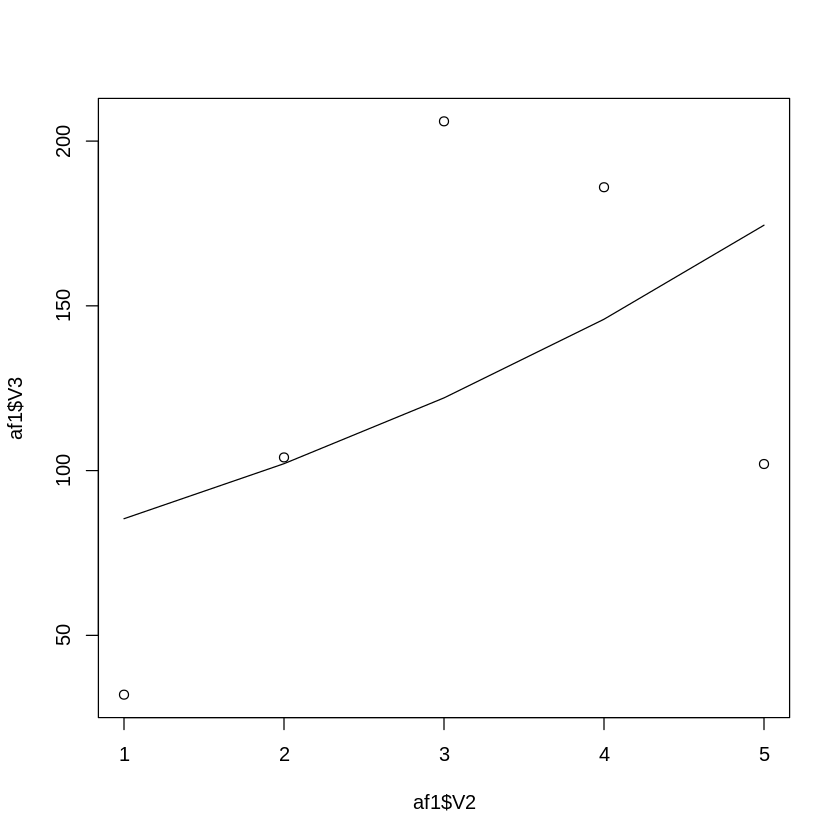

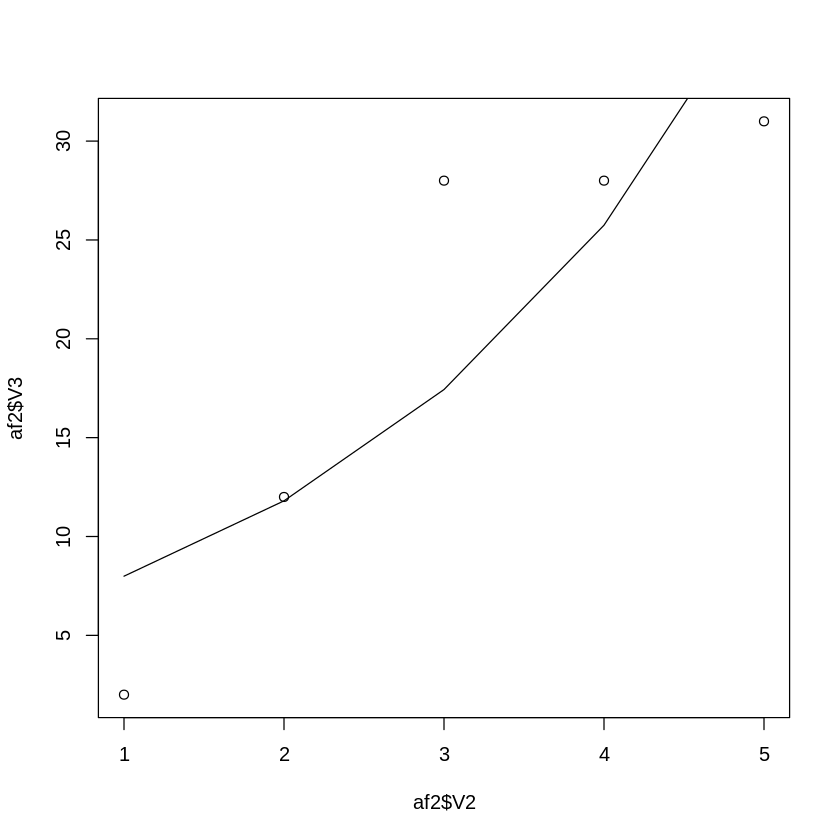

In [ ]:
aa<-read.table('/content/DoctorData.txt')
af1<-aa[aa$V5==1,]
af2<-aa[aa$V5==2,]
af1model.pos<-glm(af1$V3~af1$V2+(af1$V2)^2+(af1$V2*af1$V5)+af1$V5+(af1$V2^2*af1$V5),family=poisson(link=log))
af2model.pos<-glm(af2$V3~af2$V2+(af2$V2)^2+(af2$V2*af2$V5)+af2$V5+(af2$V2^2*af2$V5),family=poisson(link=log))
plot(af1$V2,af1$V3)
lines(af1$V2,af1model.pos$fitted.values)
plot(af2$V2,af2$V3)
lines(af2$V2,af2model.pos$fitted.values)

In [ ]:
af1model.pos$fitted.values
af2model.pos$fitted.values

1         2         3         4         5 
 85.40199 102.10310 122.07027 145.94218 174.48246

1         2         3         4         5 
 7.993265 11.804658 17.433421 25.746123 38.022533

(g)The start one peform best.

In [ ]:
install.packages(c('MASS','nnet'))
library(MASS)
library(nnet)
g<-step(amodel.pos,direction = 'backward')
summary(g)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Start:  AIC=69.59
a$V3 ~ a$V2 + (a$V2)^2 + log(a$V4) + (a$V2:a$V5) + a$V5 + (a$V2^2:a$V5) + 
    a$V5:a$V4

            Df Deviance     AIC
- a$V2:a$V5  1    0.538  67.606
<none>            0.520  69.588
- a$V5:a$V4  2   15.048  80.116
- log(a$V4)  1  126.110 193.178

Step:  AIC=67.61
a$V3 ~ a$V2 + log(a$V4) + a$V5 + a$V5:a$V4

            Df Deviance     AIC
<none>            0.538  67.606
- a$V5:a$V4  2   25.576  88.644
- a$V2       1   24.381  89.449
- log(a$V4)  1  126.615 191.683



Call:
glm(formula = a$V3 ~ a$V2 + log(a$V4) + a$V5 + a$V5:a$V4, family = poisson(link = log))

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.121e+01  2.926e+00  -7.248 4.22e-13 ***
a$V2         1.177e+00  2.434e-01   4.836 1.33e-06 ***
log(a$V4)    2.349e+00  2.217e-01  10.595  < 2e-16 ***
a$V52        1.976e+00  3.864e-01   5.113 3.16e-07 ***
a$V51:a$V4  -3.758e-05  1.397e-05  -2.689  0.00717 ** 
a$V52:a$V4  -2.282e-04  5.732e-05  -3.981 6.87e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 644.26899  on 9  degrees of freedom
Residual deviance:   0.53812  on 4  degrees of freedom
AIC: 67.606

Number of Fisher Scoring iterations: 3


# Answer2
(a)-29.89783 which is the intercept of glm means when all covarites equals to zero it shows the odd with in a log form indicating that the starting point of the wheat kernels is more likely to be in diseased condition.

-0.4233621 is the coefficient of classhrw of glm which means when class is hrw have multiplicate 1.527 in odd to be diseased which means srw are less likely to be healthy.

(b)Null hypothesis is  $β_{3,6}=β_{2,6}=0$ and alternative is $β_{3,6}\neq 0 $ or $β_{2,6}\neq 0$

(c)The prediction is diseased condtion.



In [ ]:
wk<-read.csv('wheat.csv',stringsAsFactors = TRUE)
# wk
exp(.4233621)
xh=exp(sum(c(1,0,1,25,2,25,12)*c(-29.898,-0.648,21.597,0.015,-1.069,0.287,-0.110)))
xpd=exp(sum(c(1,0,1,25,2,25,12)*c(-10.955,-0.423,6.480,0.005,-.196,0.242,-0.153)))
1/(xh+xpd+1)

[1] 1.527087

[1] 0.623191

(d)In ordered categories case:$Diseased=1<Partly Diseased=2<Healthy =3$

When class is hrw odd ratio $Pr(y\leq C)/Pr(y>C)$ multiplicate 0.8406 which means less likely to be $y\leq C$.

When density increase 1 unit the odd ratio $Pr(y\leq C)/Pr(y>C)$ multiplicate 733365 which means more likely to be $y\leq C$.

(e)Null: $β_3=0$
Alternative: $\beta_3\neq0$
I do not reject the null hypothesis since according the signifiance level of 5% which means the hardness is not a signifiant variable.

(f)
According to the AIC values, nomial regression fitted best which also has the highest residual deviance.

In [ ]:
exp(-0.17370)
exp(13.50540)
# install.packages(c("MASS","nnet"))
library(MASS)
library(nnet)
f1.model<-multinom(formula=type2~class+density+hardness+size+weight+moisture+class:density+class:hardness+class:weight+class:moisture,data=wk)
f2.model<-polr(formula=type2~class+density+hardness+size+weight+moisture+class:density+class:hardness+class:weight+class:moisture,data=wk,method="logistic")
f3.model<-polr(formula=type2~class+density+hardness+size+weight+moisture+class:density+class:hardness+class:weight+class:moisture,data=wk,method="probit")
f4.model<-polr(formula=type2~class+density+hardness+size+weight+moisture+class:density+class:hardness+class:weight+class:moisture,data=wk,method="loglog")
summary(f1.model)
summary(f2.model)
summary(f3.model)
summary(f4.model)


[1] 0.840549

[1] 733365.9

# weights:  36 (22 variable)
initial  value 302.118379 
iter  10 value 252.272067
iter  20 value 178.572324
iter  30 value 176.679298
iter  40 value 176.597605
iter  50 value 176.590468
final  value 176.590449 
converged


Call:
multinom(formula = type2 ~ class + density + hardness + size + 
    weight + moisture + class:density + class:hardness + class:weight + 
    class:moisture, data = wk)

Coefficients:
                (Intercept)   classsrw   density    hardness       size
Healthy           -28.79341 -12.601441 22.289754 0.030474087 -0.7878280
Partly Diseased   -12.60312   4.647983  8.977115 0.007756657  0.1155054
                   weight   moisture classsrw:density classsrw:hardness
Healthy         0.1780340 -0.1829890         4.157053       -0.06217328
Partly Diseased 0.1440365 -0.1834242        -1.991844       -0.08138683
                classsrw:weight classsrw:moisture
Healthy               0.2974817         0.1936977
Partly Diseased       0.2728519        -0.5373018

Std. Errors:
                (Intercept) classsrw  density   hardness      size     weight
Healthy            5.393558 12.42732 4.279740 0.01269840 0.8650396 0.08093902
Partly Diseased    3.286658 10.07248 2.600345 0.01025099 0.


Re-fitting to get Hessian




Call:
polr(formula = type2 ~ class + density + hardness + size + weight + 
    moisture + class:density + class:hardness + class:weight + 
    class:moisture, data = wk, method = "logistic")

Coefficients:
                      Value Std. Error t value
classsrw           8.941820   4.579269  1.9527
density            5.283173   1.513858  3.4899
hardness          -0.004101   0.006928 -0.5919
size               0.548588   0.410278  1.3371
weight             0.071028   0.038670  1.8368
moisture          -0.029347   0.087057 -0.3371
classsrw:density  -4.168222   2.126898 -1.9598
classsrw:hardness -0.020480   0.011739 -1.7446
classsrw:weight    0.030387   0.039226  0.7747
classsrw:moisture -0.352813   0.325942 -1.0824

Intercepts:
                        Value   Std. Error t value
Diseased|Healthy         8.0630  1.9798     4.0726
Healthy|Partly Diseased 10.0189  2.0158     4.9701

Residual Deviance: 502.278 
AIC: 526.278 


Re-fitting to get Hessian




Call:
polr(formula = type2 ~ class + density + hardness + size + weight + 
    moisture + class:density + class:hardness + class:weight + 
    class:moisture, data = wk, method = "probit")

Coefficients:
                       Value Std. Error t value
classsrw           5.2149051   2.715433  1.9205
density            3.0289733   0.840300  3.6046
hardness          -0.0009658   0.003940 -0.2451
size               0.3336715   0.244988  1.3620
weight             0.0445812   0.022721  1.9621
moisture          -0.0319041   0.050700 -0.6293
classsrw:density  -2.2836592   1.240259 -1.8413
classsrw:hardness -0.0149496   0.006954 -2.1497
classsrw:weight    0.0168037   0.022897  0.7339
classsrw:moisture -0.2098618   0.197157 -1.0644

Intercepts:
                        Value   Std. Error t value
Diseased|Healthy         4.6144  1.1206     4.1177
Healthy|Partly Diseased  5.7854  1.1335     5.1041

Residual Deviance: 499.9119 
AIC: 523.9119 


Re-fitting to get Hessian




Call:
polr(formula = type2 ~ class + density + hardness + size + weight + 
    moisture + class:density + class:hardness + class:weight + 
    class:moisture, data = wk, method = "loglog")

Coefficients:
                       Value Std. Error t value
classsrw           4.7426707   2.876886  1.6485
density            3.3468747   0.767117  4.3629
hardness          -0.0005577   0.004466 -0.1249
size               0.3931160   0.264343  1.4871
weight             0.0567455   0.023433  2.4216
moisture          -0.0571247   0.054753 -1.0433
classsrw:density  -1.8224460   1.221524 -1.4919
classsrw:hardness -0.0143560   0.007900 -1.8173
classsrw:weight    0.0060067   0.024083  0.2494
classsrw:moisture -0.1816397   0.211045 -0.8607

Intercepts:
                        Value   Std. Error t value
Diseased|Healthy         5.6158  1.1653     4.8192
Healthy|Partly Diseased  6.9796  1.1815     5.9073

Residual Deviance: 485.8594 
AIC: 509.8594 

Null: all coefficients in glm equal to zero except intercept.
Alternative: at least one coefficients in glm do not equal zero except intercept.


In [12]:
#q3
q3<-read.csv('5A.csv')
q3$missing<-factor(q3$missing)
attach(q3)
q3.alogit<-glm(missing ~ sex+karnof+cd4+priorzdv+age,family = binomial(link="logit"))
q3.aprobit<-glm(missing ~ sex+karnof+cd4+priorzdv+age,family = binomial(link="probit"))
q3.acloglog<-glm(missing ~ sex+karnof+cd4+priorzdv+age,family = binomial(link="cloglog"))
summary(q3.alogit)
summary(q3.aprobit)
summary(q3.acloglog)




Call:
glm(formula = missing ~ sex + karnof + cd4 + priorzdv + age, 
    family = binomial(link = "logit"))

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -2.804669   1.412626  -1.985   0.0471 *
sex         -0.269482   0.284655  -0.947   0.3438  
karnof       0.009504   0.013613   0.698   0.4851  
cd4          0.001376   0.001410   0.976   0.3290  
priorzdv    -0.001811   0.003639  -0.498   0.6187  
age         -0.000697   0.011801  -0.059   0.9529  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 729.24  on 1124  degrees of freedom
Residual deviance: 726.51  on 1119  degrees of freedom
AIC: 738.51

Number of Fisher Scoring iterations: 5



Call:
glm(formula = missing ~ sex + karnof + cd4 + priorzdv + age, 
    family = binomial(link = "probit"))

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -1.6189738  0.7190002  -2.252   0.0243 *
sex         -0.1389065  0.1425703  -0.974   0.3299  
karnof       0.0050928  0.0069398   0.734   0.4630  
cd4          0.0007180  0.0007303   0.983   0.3255  
priorzdv    -0.0009344  0.0018325  -0.510   0.6101  
age         -0.0001858  0.0060478  -0.031   0.9755  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 729.24  on 1124  degrees of freedom
Residual deviance: 726.45  on 1119  degrees of freedom
AIC: 738.45

Number of Fisher Scoring iterations: 5



Call:
glm(formula = missing ~ sex + karnof + cd4 + priorzdv + age, 
    family = binomial(link = "cloglog"))

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -2.8115119  1.3429289  -2.094   0.0363 *
sex         -0.2555563  0.2720094  -0.940   0.3475  
karnof       0.0088887  0.0129331   0.687   0.4919  
cd4          0.0012995  0.0013321   0.976   0.3293  
priorzdv    -0.0017193  0.0034698  -0.495   0.6203  
age         -0.0007549  0.0111944  -0.067   0.9462  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 729.24  on 1124  degrees of freedom
Residual deviance: 726.52  on 1119  degrees of freedom
AIC: 738.52

Number of Fisher Scoring iterations: 5


In [13]:
q3.summary=summary(q3.alogit)
names(q3.summary)

[1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "deviance.resid" "coefficients"  
[13] "aliased"        "dispersion"     "df"             "cov.unscaled"  
[17] "cov.scaled"

In [16]:
(-q3.summary$deviance+q3.summary$null.deviance)/5
1-pchisq((-q3.summary$deviance+q3.summary$null.deviance),df=q3.summary$df.null-q3.summary$df.residual)

[1] 0.5462568

[1] 0.7413297

In [ ]:
q3b<-q3[q3$missing==0,]
q3b

,id,time_d,missing,sex,karnof,cd4,priorzdv,age
,<int>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<int>
2,2,287,0,2,90,149.5,15,34
3,3,242,0,1,100,23.5,9,20
4,4,199,0,1,90,46.0,53,48
5,5,286,0,1,90,10.0,12,46
6,6,285,0,1,70,0.0,24,51
7,7,270,0,1,100,54.5,6,51
8,8,285,0,1,80,117.5,24,40
9,9,276,0,1,100,95.0,7,34
10,10,306,0,1,90,71.0,7,38


In [ ]:
# install.packages('lme4')
# library(lme4)
# library(Matrix)
q3b.mle<- lmer(log(time_d) ~ 1+(1 | sex)+karnof+cd4+priorzdv+age, q3b, REML = FALSE)
q3b.rmle<- lmer(log(time_d) ~ 1+(1 | sex)+karnof+cd4+priorzdv+age, q3b, REML = TRUE)

boundary (singular) fit: see help('isSingular')



In [ ]:


summary(q3b.mle)
summary(q3b.rmle)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: log(time_d) ~ 1 + (1 | sex) + karnof + cd4 + priorzdv + age
   Data: q3b

     AIC      BIC   logLik deviance df.resid 
  1697.8   1732.3   -841.9   1683.8     1006 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-9.5847 -0.1563  0.2906  0.5637  1.1727 

Random effects:
 Groups   Name        Variance Std.Dev.
 sex      (Intercept) 0.0000   0.0000  
 Residual             0.3086   0.5555  
Number of obs: 1013, groups:  sex, 2

Fixed effects:
              Estimate Std. Error t value
(Intercept)  5.2657346  0.2326209  22.637
karnof      -0.0001019  0.0023219  -0.044
cd4         -0.0009677  0.0002553  -3.791
priorzdv     0.0007252  0.0005912   1.227
age          0.0054075  0.0020400   2.651

Correlation of Fixed Effects:
         (Intr) karnof cd4    prrzdv
karnof   -0.937                     
cd4       0.081 -0.166              
priorzdv -0.049  0.024 -0.088       
age      -0.425  0.113 -0.054 -0.128
optimiz

Linear mixed model fit by REML ['lmerMod']
Formula: log(time_d) ~ 1 + (1 | sex) + karnof + cd4 + priorzdv + age
   Data: q3b

REML criterion at convergence: 1738.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-9.5721 -0.1600  0.2908  0.5610  1.1812 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sex      (Intercept) 0.0006193 0.02489 
 Residual             0.3099659 0.55675 
Number of obs: 1013, groups:  sex, 2

Fixed effects:
              Estimate Std. Error t value
(Intercept)  5.262e+00  2.338e-01  22.503
karnof      -8.273e-05  2.327e-03  -0.036
cd4         -9.662e-04  2.559e-04  -3.776
priorzdv     7.240e-04  5.925e-04   1.222
age          5.275e-03  2.052e-03   2.571

Correlation of Fixed Effects:
         (Intr) karnof cd4    prrzdv
karnof   -0.934                     
cd4       0.081 -0.166              
priorzdv -0.048  0.024 -0.088       
age      -0.421  0.111 -0.054 -0.127

# Answer 4
(a)Yes,all of them are reasonable to use respectively.The MLE and REML can be suitable to most of the situation while the moment is also suitable to balanced datasets.And in this case they would likely have the same $\hat\mu$ while the other two $\hat\sigma$ may be different.

In [19]:
# install.packages('lme4')
# library(lme4)
# library(Matrix)
mu<-3
sigmasq_a<-2
sigmasq<-1
g<-4
m<-20
set.seed(101)
  alpha<-rnorm(g,0,sqrt(sigmasq_a))
  epsilon<-rnorm(m*g,0,sqrt(sigmasq))
  group<-rep(1:g,m)
  data<-alpha+epsilon+mu
  dmle<-lmer(data ~ 1+(1|group),REML=FALSE)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’


Loading required package: Matrix



In [25]:
summary(dmle)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: data ~ 1 + (1 | group)

     AIC      BIC   logLik deviance df.resid 
   229.2    236.3   -111.6    223.2       77 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5002 -0.6909  0.1177  0.7061  2.1606 

Random effects:
 Groups   Name        Variance Std.Dev.
 group    (Intercept) 0.3088   0.5557  
 Residual             0.8580   0.9263  
Number of obs: 80, groups:  group, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)   2.8402     0.2965   9.578

In [26]:
summary(dmle)$coefficients[1]

[1] 2.840193

In [ ]:
#q4
mu<-3
sigmasq_a<-2
sigmasq<-1
g<-4
m<-20
datasets<-NULL
for(k in 1:1000){
  alpha<-rnorm(g,0,sqrt(sigmasq_a))
  epsilon<-rnorm(m*g,0,sqrt(sigmasq))
  group<-rep(1:g,m)
  data<-alpha+epsilon+mu
  datasets<-rbind(datasets,data)
}
MLE<-RMLE<-ME<-NULL
for(i in 1:dim(datasets)[1]){
  data<-datasets[i,]
  dmle<-lmer(data ~ 1+(1|group),REML=FALSE)
  drmle<-lmer(data ~ 1+(1|group),REML=TRUE)
  dint<-summary(dmle)$coef[1]
  dintr<-summary(drmle)$coef[1]
  sse<-sum((c(coef(dmle)$group[[1]])-c(dint))^2)*m
  sst<-var(data)*(m*g-1)
  ssr<- sst-sse
  dme_i<-dint
  dme_a<-(sse/(g-1)-ssr/(m-1)/g)/m
  dme_s<-ssr/(m-1)/g
  MLE<-rbind(MLE,c(dint,as.data.frame(VarCorr(dmle))[,5]))
  RMLE<-rbind(RMLE,c(dintr,as.data.frame(VarCorr(drmle))[,5]))
  ME<-rbind(ME,c(dme_i,dme_a,dme_s))
}


boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



(b)According to the results , the MLE have best results because it have the largest information.

In [ ]:
mean(MLE[,2])
mean(RMLE[,2])
sum(ME[,2])
mean(MLE[,2]<RMLE[,2])
mean(MLE[,2]<ME[,2])

[1] 1106.316

[1] 1286.002

[1] 1857.848

[1] 0.995

[1] 0.663

In [ ]:
sum(MLE[,3])
sum(RMLE[,3])
sum(ME[,3])

[1] 991.6856

[1] 991.7334

[1] 1089.839

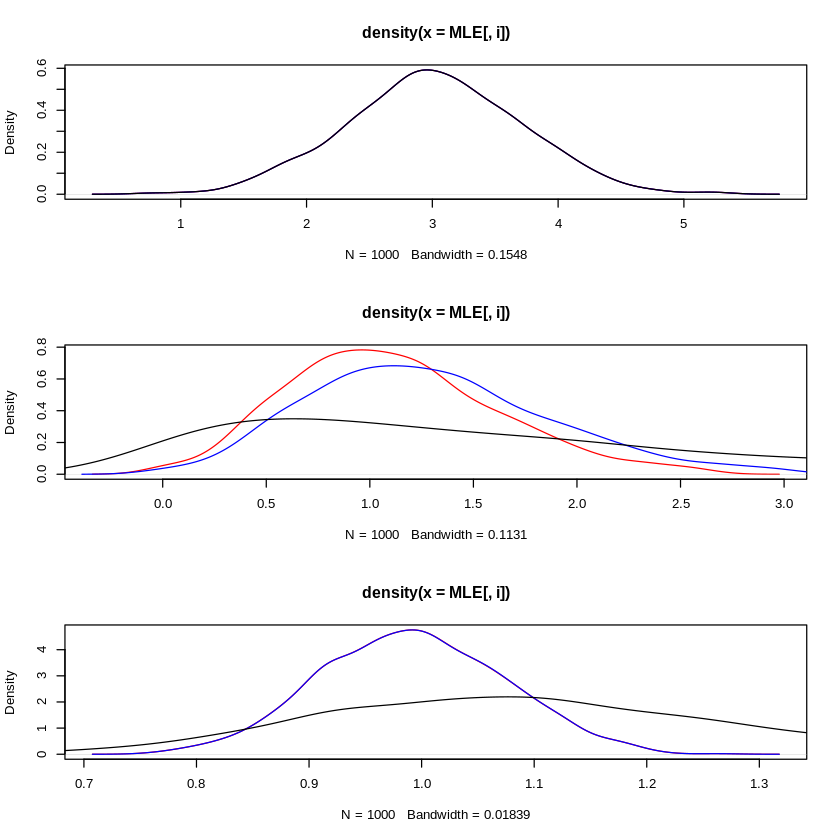

In [ ]:
par(bg='white',mfrow = c(3,1))
for(i in 1:3){
plot(density(MLE[,i]),col = 'red')
lines(density(RMLE[,i]),col='blue')
lines(density(ME[,i]))
}

In [ ]:
quantile(MLE[,1],c(0.025,0.975))
quantile(RMLE[,1],c(0.025,0.975))
quantile(ME[,1],c(0.025,0.975))

2.5%    97.5% 
1.670626 4.363247

2.5%    97.5% 
1.670626 4.363247

2.5%    97.5% 
1.670626 4.363247